In [119]:
import datascience as ds
import numpy as np
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt 

In [3]:
iris = datasets.load_iris()
print('An array of 4 items: sepal length, sepal width, petal length, petal width')
print(iris['data'])


An array of 4 items: sepal length, sepal width, petal length, petal width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 

In [23]:
print('Target:', '0=setosa', '1=versicolor', '2=virginica')
print(iris['target'])

Target: 0=setosa 1=versicolor 2=virginica
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [75]:
sepal_lengths = []
sepal_widths = []
petal_lengths = []
petal_widths = []
species = []
data = iris['data']

## print(data)


for sepal_length,sepal_width,petal_length,petal_width in data:
    sepal_lengths.append(sepal_length)
    sepal_widths.append(sepal_width)
    petal_lengths.append(petal_length)
    petal_widths.append(petal_width)

    
for target in iris['target']:
    ## species.append(target)
    if target == 0:
        species.append('Setosa')
    elif target == 1:
        species.append('Versicolor')
    elif target == 2:
        species.append('Virginica')
        
## Set up training, development and test arrays
## There are 150 flowers in this set
## We will choose a random 100 for training, 25 for development and 25 for test

def generate_training_dev_test_positions(train,dev,test):
    import random
    total = train+dev+test
    all_positions = list(range(total))
    train_positions = []
    dev_positions = []
    test_positions = []
    for n in range(train):
        next_pos = random.randint(0,len(all_positions)-1)
        train_positions.append(all_positions.pop(next_pos))
        ## pop removes the item from all_positions
        ## append adds it to train_positions
    for n in range(dev):
        next_pos = random.randint(0,len(all_positions)-1)
        dev_positions.append(all_positions.pop(next_pos))
    test_positions = all_positions ## the remaining items are test
    train_positions.sort()
    dev_positions.sort()
    test_positions.sort()   
    return(train_positions,dev_positions,test_positions)

train_positions,dev_positions,test_positions = \
generate_training_dev_test_positions(100,25,25)

def get_positions_from_list (inlist, positions):
    outlist = []
    for position in positions:
        outlist.append(inlist[position])
    return(outlist)
    
def make_iris_table(positions):
    global sepal_lengths
    global sepal_widths
    global petal_lengths
    global petal_widths
    global species
    local_s_lengths = get_positions_from_list(sepal_lengths,positions)
    local_s_widths = get_positions_from_list(sepal_widths, positions)
    local_p_lengths = get_positions_from_list(petal_lengths,positions)
    local_p_widths = get_positions_from_list(petal_widths,positions)
    local_species = get_positions_from_list(species,positions)
    Iris_Table = ds.Table().with_columns('Sepal_Length',ds.make_array(local_s_lengths)[0],\
                                     'Sepal_Width',ds.make_array(local_s_widths)[0],\
                                     'Petal_Length',ds.make_array(local_p_lengths)[0],\
                                     'Petal_Width',ds.make_array(local_p_widths)[0],\
                                     'Species',ds.make_array(local_species)[0])
    return(Iris_Table)

Iris_training_Table = make_iris_table(train_positions)
Iris_dev_Table = make_iris_table(dev_positions)
Iris_dev_Table = make_iris_table(test_positions)

## print(Iris_Table)

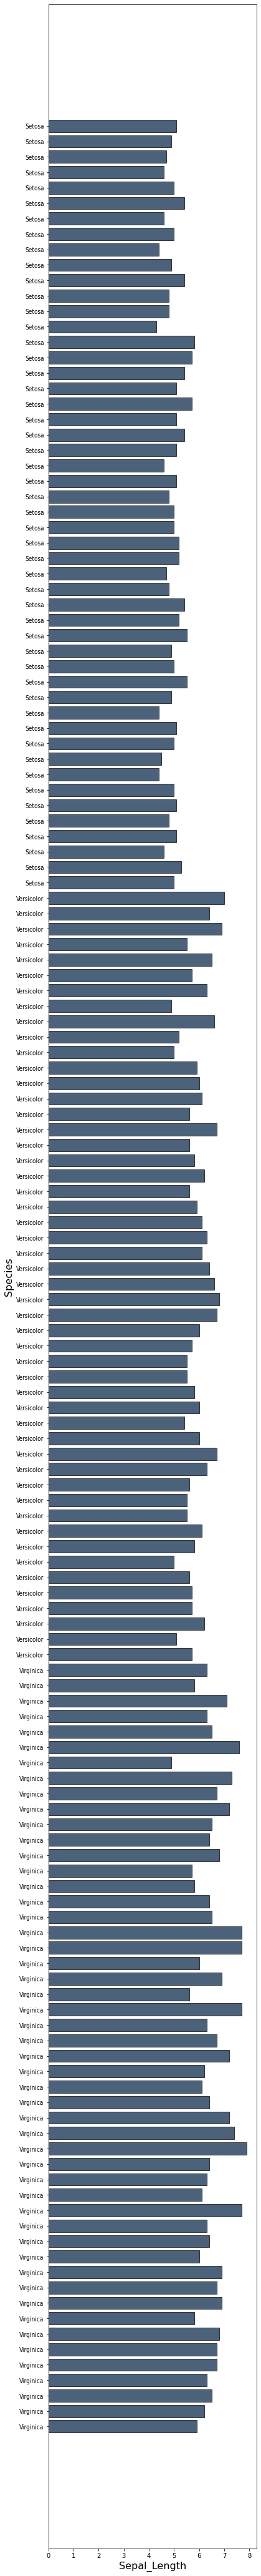

In [56]:
Iris_training_Table.barh('Species','Sepal_Length')

Species,Sepal_Length average,Sepal_Width average,Petal_Length average,Petal_Width average
Setosa,5.06061,3.51212,1.46364,0.251515
Versicolor,5.93784,2.77568,4.27568,1.31622
Virginica,6.50333,2.91333,5.54,1.99667


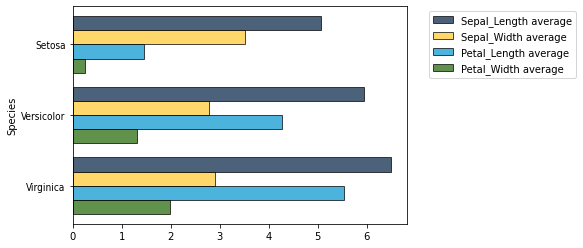

In [76]:
def average(sequence):
    if len(sequence) == 0:
        return(0)
    else:
        return(sum(sequence)/len(sequence))
Iris_Table2=Iris_training_Table.group('Species',average)
Iris_Table2.show()
Iris_Table2.barh('Species')

In [155]:
def change_species_to_number(species_string):
    ## return(species_string)
    if species_string == 'Setosa':
        return(0)
    elif species_string == 'Versicolor':
        return(1)
    elif species_string == 'Virginica':
        return(2)
    else:
        print('error:',species_string)
        return(99)
    
def make_ml_arrays (positions):
    local_s_lengths = get_positions_from_list(sepal_lengths,positions)
    local_s_widths = get_positions_from_list(sepal_widths, positions)
    local_p_lengths = get_positions_from_list(petal_lengths,positions)
    local_p_widths = get_positions_from_list(petal_widths,positions)
    X_list = []
    for position in positions:
        s_length = sepal_lengths[position]
        s_width = sepal_widths[position]
        p_length = petal_lengths[position]
        p_width = petal_widths[position]
        X_list.append([s_length,s_width,p_length,p_width])
    local_species = get_positions_from_list(species,positions)
    training_X_features = ds.make_array(X_list)[0]
    for i in range(len(local_species)):
        local_species[i] = change_species_to_number(local_species[i])
    training_Y_features= ds.make_array(local_species)[0]
    return(training_X_features,training_Y_features)

In [156]:
from sklearn import linear_model
regr = linear_model.LogisticRegression(C=1e6)
train_X,train_Y = make_ml_arrays(train_positions)



regr.fit(train_X,train_Y)   ## logistic regression model

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
print('Regression Coefficients',regr.coef_)  ## coefficients used by the formula for the regression line
dev_X,dev_Y = make_ml_arrays(dev_positions)
print('X for Development',dev_X)
print('Y for Development',dev_Y)



Regression Coefficients [[ 17.80914993  35.87952206 -43.91421693 -20.14406165]
 [  9.89972603  -6.723934   -33.11701149  -9.10910159]
 [-27.70887595 -29.15558805  77.03122843  29.25316325]]
X for Development [[4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [5.  3.  1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [4.9 3.1 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [4.8 3.  1.4 0.3]
 [6.5 2.8 4.6 1.5]
 [4.9 2.4 3.3 1. ]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 6.  2.5]
 [7.1 3.  5.9 2.1]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.3 5.7 2.5]
 [6.5 3.  5.2 2. ]]
Y for Development [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [174]:
def choose_species_manual(s_length,s_width,p_length,p_width):
    Seto_score = 0
    Vers_score = 0
    Virg_score = 0
    
    Seto_score += -1*abs(s_length-5.06)
    Vers_score += -1*abs(s_length-5.93)
    Virg_score += -1*abs(s_length-6.5)
    
    Seto_score += -1*abs(s_width-3.51)
    Vers_score += -1*abs(s_width-2.78)
    Virg_score += -1*abs(s_width-2.91)
    
    Seto_score += -1*abs(p_length-1.46)
    Vers_score += -1*abs(p_length-4.28)
    Virg_score += -1*abs(p_length-5.54)
    
    Seto_score += -1*abs(p_width-.25)
    Vers_score += -1*abs(p_width-1.32)
    Virg_score += -1*abs(p_width-2.00)  
    
    if (Seto_score > Vers_score) and (Seto_score > Virg_score):
        return('Setosa')
    elif (Vers_score > Virg_score):
        return('Versicolor')
    else:
        return('Virginica')
    
def generate_answers_manually(input_array):
    output= []
    for s_length,s_width,p_lenth,p_width in input_array:
        output.append(choose_species_manual(s_length,s_width,p_lenth,p_width))
    return(output)

manual_answers = generate_answers_manually(dev_X)  ## output of manual rules
print(manual_answers)
for i in range(len(manual_answers)):
    manual_answers[i]=change_species_to_number(manual_answers[i])
print(manual_answers)
print(dev_Y)
correct = 0
for i in range(len(manual_answers)):
    if manual_answers[i] == dev_Y[i]:
        correct +=1
print(correct,'correct out of', len(dev_Y))
print('Accuracy:',correct/len(dev_Y))

['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
24 correct out of 25
Accuracy: 0.96


In [133]:
lr_system_output = regr.predict(dev_X)

print(lr_system_output)

print('Average difference:',np.mean(lr_system_output - dev_Y)**2))  ## average differences from predicted resultsregr.score(dev_X,dev_Y)  ## accuracy score based on logistic regression output

0.96

In [135]:
print('Answer Key',dev_Y)


Answer Key [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [136]:
for i in range(len(dev_Y)):
    answer = dev_Y[i]
    output = lr_system_output[i]
    evidence = dev_X[i]
    if answer == output:
        print(answer, 'is correct for',evidence)
    else:
        print('Evidence is',evidence,'System = ',output,'Answer = ',answer)

0 is correct for [4.7 3.2 1.3 0.2]
0 is correct for [4.6 3.1 1.5 0.2]
0 is correct for [5.  3.4 1.5 0.2]
0 is correct for [5.7 3.8 1.7 0.3]
0 is correct for [5.  3.  1.6 0.2]
0 is correct for [5.2 3.5 1.5 0.2]
0 is correct for [5.2 4.1 1.5 0.1]
0 is correct for [4.9 3.1 1.5 0.2]
0 is correct for [5.  3.5 1.6 0.6]
0 is correct for [4.8 3.  1.4 0.3]
1 is correct for [6.5 2.8 4.6 1.5]
1 is correct for [4.9 2.4 3.3 1. ]
1 is correct for [6.7 3.  5.  1.7]
1 is correct for [6.  2.9 4.5 1.5]
1 is correct for [5.5 2.5 4.  1.3]
2 is correct for [6.3 3.3 6.  2.5]
2 is correct for [7.1 3.  5.9 2.1]
2 is correct for [6.7 2.5 5.8 1.8]
2 is correct for [6.8 3.  5.5 2.1]
2 is correct for [7.7 2.8 6.7 2. ]
Evidence is [6.3 2.7 4.9 1.8] System =  1 Answer =  2
2 is correct for [6.4 2.8 5.6 2.1]
2 is correct for [7.9 3.8 6.4 2. ]
2 is correct for [6.7 3.3 5.7 2.5]
2 is correct for [6.5 3.  5.2 2. ]


In [151]:
## https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [152]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [153]:
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4
